In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

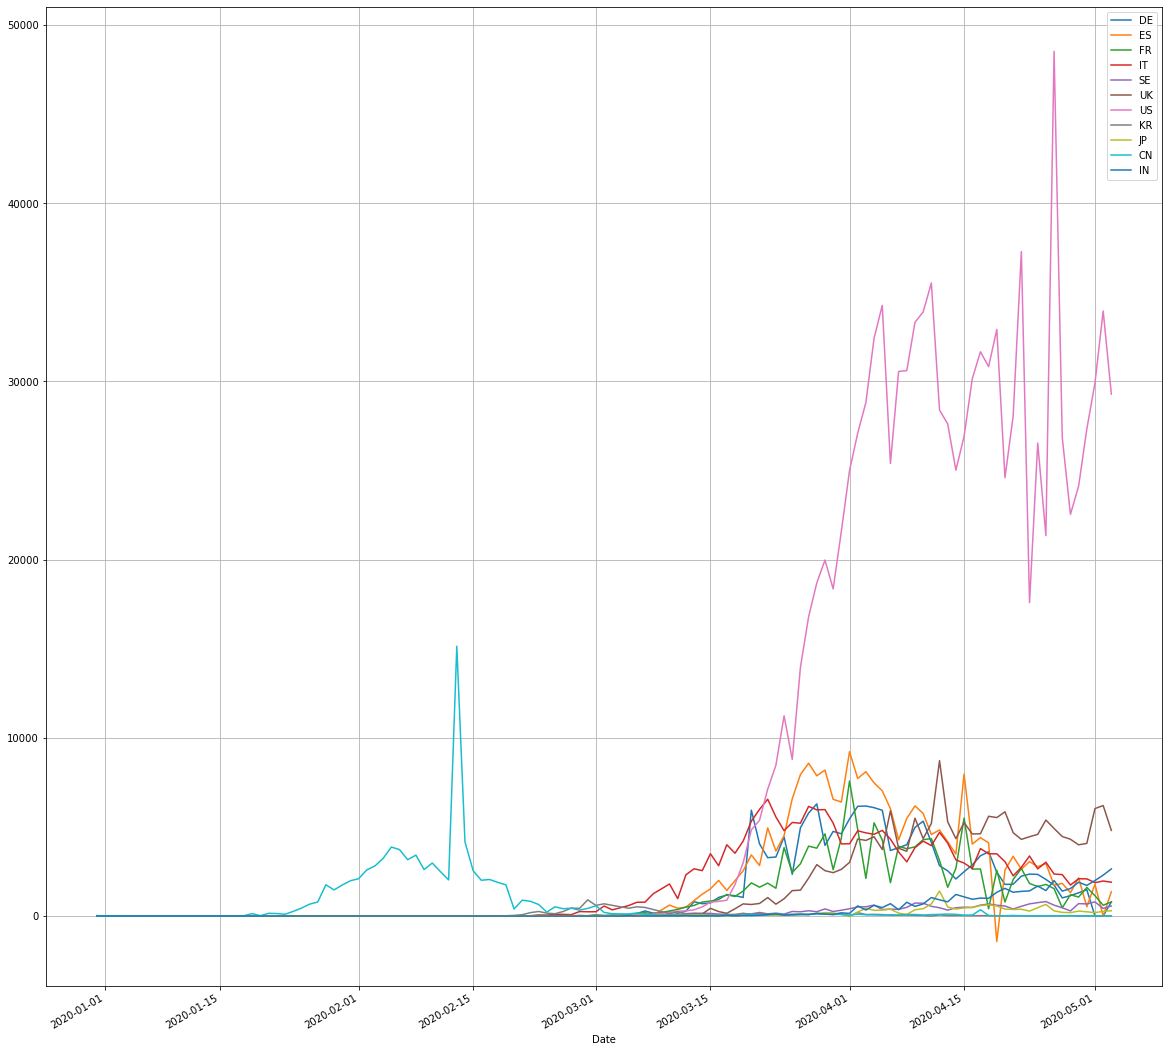

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

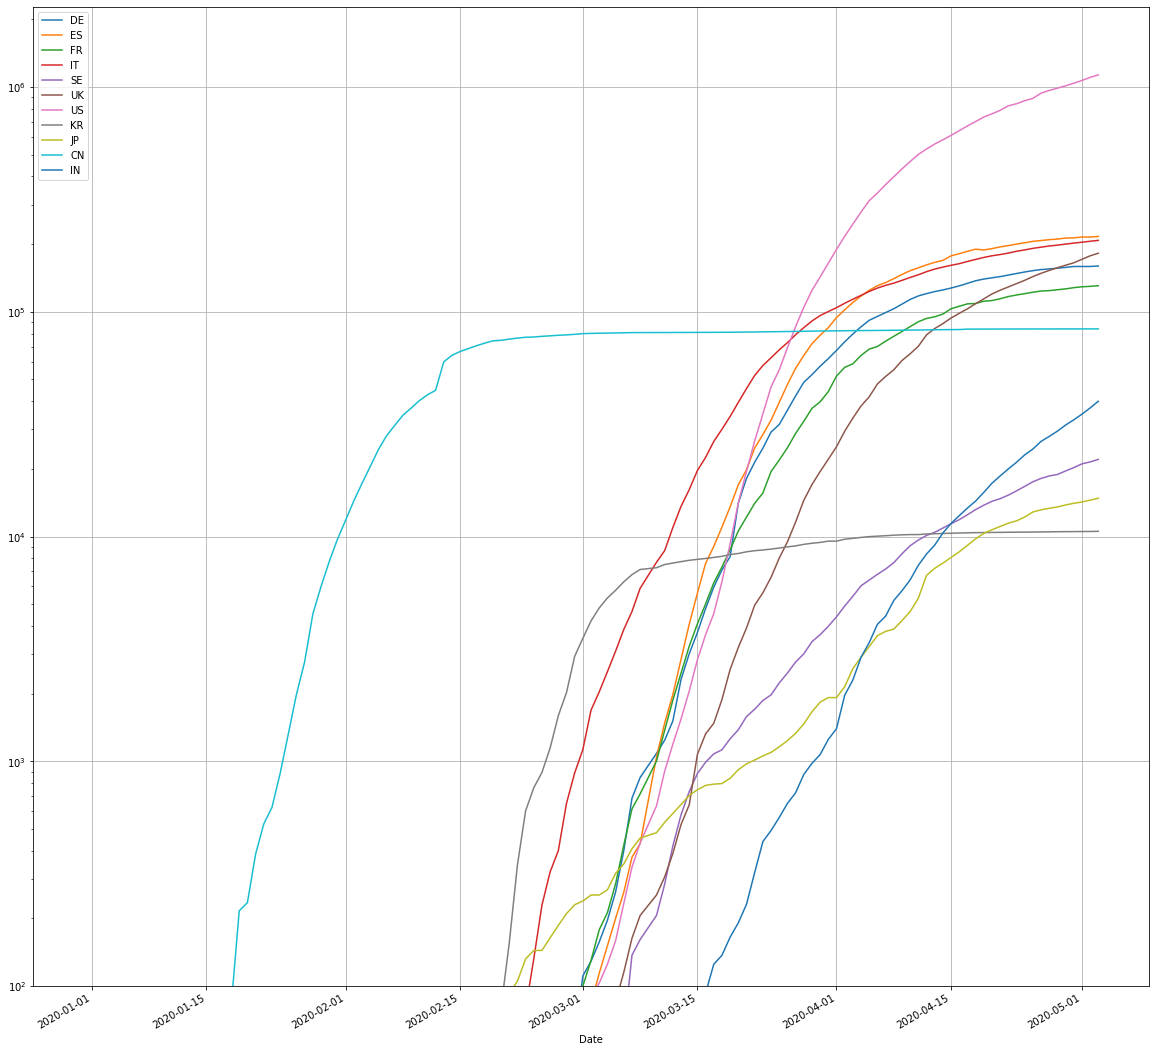

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

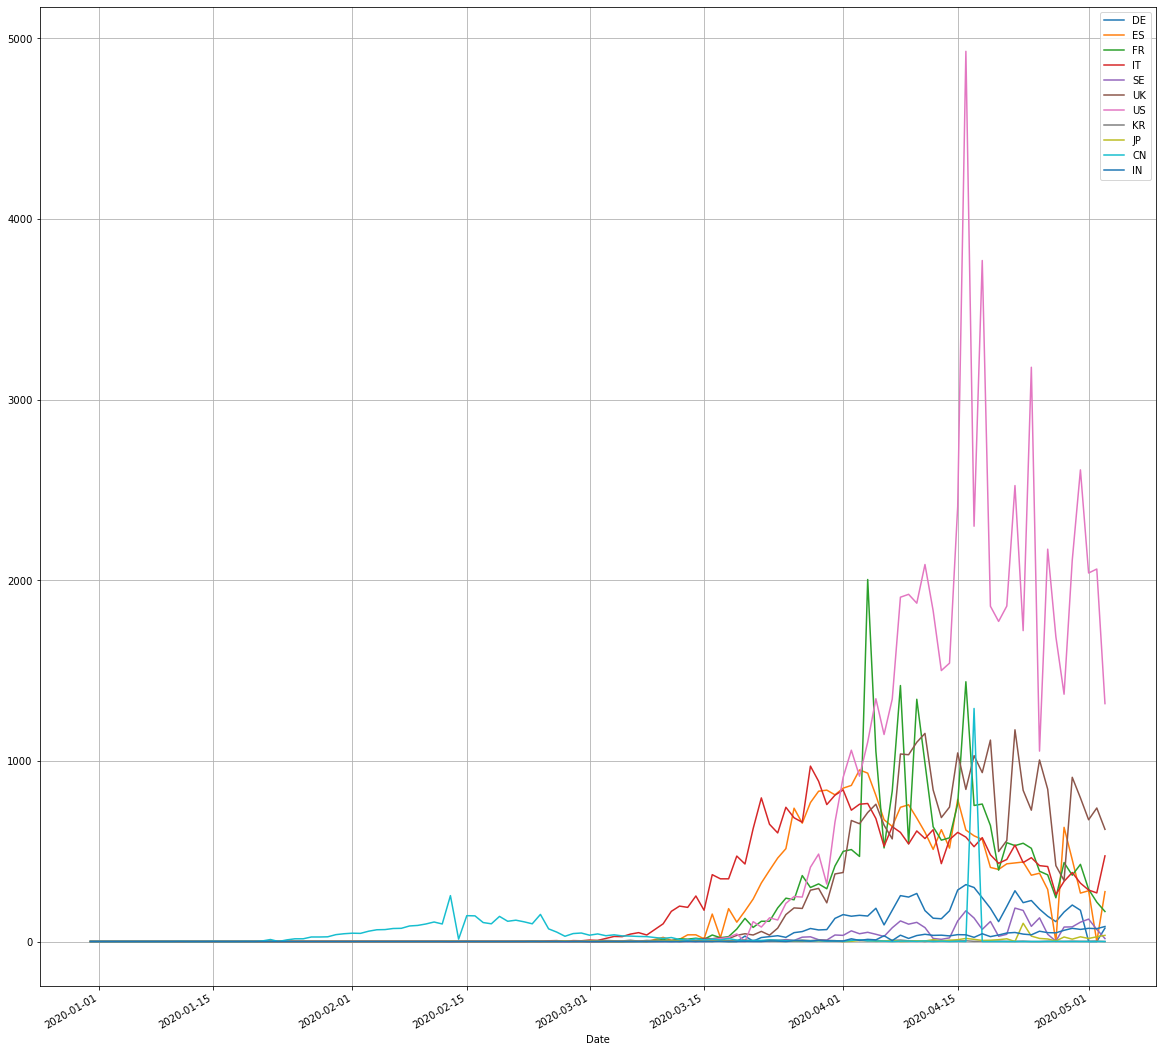

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

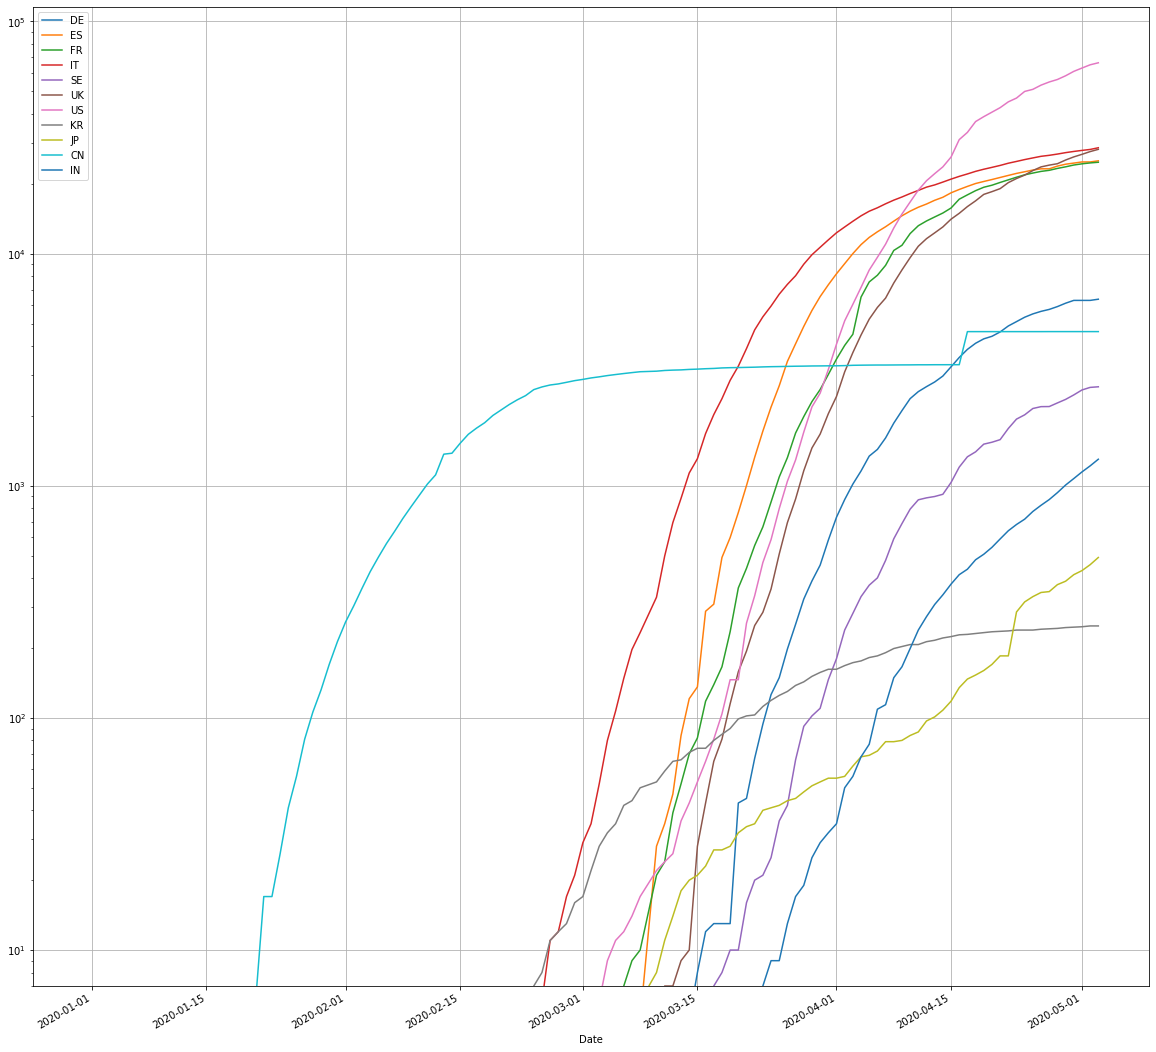

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-04-19,2458.0,-1430.0,2569,3491,606,5525,32922,8,566,18,1334
12,2020-04-20,1775.0,2585.0,785,3047,563,5850,24601,13,390,14,1553
11,2020-04-21,1785.0,3352.0,2051,2256,392,4676,28065,9,367,32,1335
10,2020-04-22,2237.0,2627.0,2667,2729,545,4301,37289,11,378,15,1384
9,2020-04-23,2352.0,3052.0,1827,3370,682,4451,17588,8,276,12,1409
8,2020-04-24,2337.0,2767.0,1653,2646,751,4583,26543,6,468,8,1684
7,2020-04-25,2055.0,2944.0,1773,3021,812,5386,21352,10,652,15,1429
6,2020-04-26,1737.0,1729.0,1537,2357,610,4913,48529,10,290,10,1990
5,2020-04-27,1018.0,1831.0,461,2324,463,4463,26857,10,203,3,1396
4,2020-04-28,1144.0,1308.0,1195,1739,286,4309,22541,14,191,26,1543


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-19,139842.0,188419.0,111411.0,174433.0,13780.0,114150.0,734965.0,10413.0,10328.0,83758.0,15712.0
2020-04-20,141617.0,191004.0,112196.0,177480.0,14343.0,120000.0,759566.0,10426.0,10718.0,83772.0,17265.0
2020-04-21,143402.0,194356.0,114247.0,179736.0,14735.0,124676.0,787631.0,10435.0,11085.0,83804.0,18600.0
2020-04-22,145639.0,196983.0,116914.0,182465.0,15280.0,128977.0,824920.0,10446.0,11463.0,83819.0,19984.0
2020-04-23,147991.0,200035.0,118741.0,185835.0,15962.0,133428.0,842508.0,10454.0,11739.0,83831.0,21393.0
2020-04-24,150328.0,202802.0,120394.0,188481.0,16713.0,138011.0,869051.0,10460.0,12207.0,83839.0,23077.0
2020-04-25,152383.0,205746.0,122167.0,191502.0,17525.0,143397.0,890403.0,10470.0,12859.0,83854.0,24506.0
2020-04-26,154120.0,207475.0,123704.0,193859.0,18135.0,148310.0,938932.0,10480.0,13149.0,83864.0,26496.0
2020-04-27,155138.0,209306.0,124165.0,196183.0,18598.0,152773.0,965789.0,10490.0,13352.0,83867.0,27892.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-04-19,184.0,410.0,642,480,111,1115,1856,2,7,0,27
12,2020-04-20,110.0,399.0,395,433,29,498,1772,2,10,0,36
11,2020-04-21,194.0,430.0,547,454,40,559,1857,1,15,0,47
10,2020-04-22,281.0,435.0,531,534,185,1172,2524,1,0,0,50
9,2020-04-23,215.0,440.0,544,437,172,837,1721,2,101,0,41
8,2020-04-24,227.0,367.0,516,464,84,727,3179,0,30,0,37
7,2020-04-25,179.0,378.0,389,420,131,1005,1054,0,17,0,57
6,2020-04-26,140.0,288.0,369,415,40,843,2172,2,14,0,49
5,2020-04-27,110.0,0.0,242,260,2,420,1687,1,3,1,48
4,2020-04-28,163.0,632.0,437,333,80,338,1369,1,25,0,62


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-19,4294.0,20453.0,19314.0,23094.0,1511.0,17994.0,38906.0,233.0,160.0,4613.0,507.0
2020-04-20,4404.0,20852.0,19709.0,23527.0,1540.0,18492.0,40678.0,235.0,170.0,4613.0,543.0
2020-04-21,4598.0,21282.0,20256.0,23981.0,1580.0,19051.0,42535.0,236.0,185.0,4613.0,590.0
2020-04-22,4879.0,21717.0,20787.0,24515.0,1765.0,20223.0,45059.0,237.0,185.0,4613.0,640.0
2020-04-23,5094.0,22157.0,21331.0,24952.0,1937.0,21060.0,46780.0,239.0,286.0,4613.0,681.0
2020-04-24,5321.0,22524.0,21847.0,25416.0,2021.0,21787.0,49959.0,239.0,316.0,4613.0,718.0
2020-04-25,5500.0,22902.0,22236.0,25836.0,2152.0,22792.0,51013.0,239.0,333.0,4613.0,775.0
2020-04-26,5640.0,23190.0,22605.0,26251.0,2192.0,23635.0,53185.0,241.0,347.0,4613.0,824.0
2020-04-27,5750.0,23190.0,22847.0,26511.0,2194.0,24055.0,54872.0,242.0,350.0,4614.0,872.0
